In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_int =pd.read_csv('data/final_intersection.csv')

In [3]:
data_int = data_int[['code','inter']]
data_int = data_int.set_index('code')

In [4]:
data_int.head()

,inter
code,
a190160,"['a196230', 'a190160', 'a130730', 'a190620', '..."
a143460,"['a223190', 'a102110', 'a183710', 'a152280', '..."
a226490,"['a102110', 'a227830', 'a152500', 'a69500', 'a..."
a105190,"['a102110', 'a227830', 'a152500', 'a69500', 'a..."
a108590,"['a102110', 'a152500', 'a69500', 'a152870', 'a..."


#### 최종 데이터셋

In [5]:
#33개의 종목을 이용(총 35개)  
#'a211260', 'a211560' 의경우 서로만 관계있어서 제외 #KINDEX 배당성장, TIGER 배당성장)

In [6]:
set01 = ['a130730', 'a190620', 'a153130', 'a190160', 'a196230', 'a214980']
# KOSEF 단기자금, KINDEX 단기통안채, KODEX 단기채권, ARIRANG 단기유동성, KBSTAR 단기통안채, KODEX 단기채권PLUS

In [7]:
set02 = ['a166400','a152500','a122630','a226490','a137930',
         'a123320','a102110','a152100','a105190','a152280']
# ''TIGER 200커버드콜5%OTM,'KINDEX 레버리지',''KODEX 레버리지,'KODEX 코스피',''마이다스 200커버드콜5%OTM,
# ''TIGER 레버리지,''TIGER 200,'ARIRANG 200','KINDEX 200','KOSEF 200 선물'

In [8]:
set03 = ['a152280', 'a170350', 'a152500', 'a122630', 'a123320']
# KODEX 레버리지, TIGER 베타플러스, KINDEX 레버리지, TIGER 레버리지, KOSEF 200 선물

In [9]:
set04 = ['a152500', 'a122630', 'a102110', 'a123320','a152870','a69500','a152280',
         'a100910','a152100','a159800','a183710','a140950','a148020','a153270',
         'a226490','a105190','a108590','a69660','a156080','a122090','a168300', ] 
# 'KINDEX 레버리지','KODEX 레버리지','TIGER 200','TIGER 레버리지','파워 200','KODEX 200','KOSEF 200 선물',
# 'KOSEF KRX100','ARIRANG 200','마이티 코스피100','KBSTAR 주식혼합','파워 코스피100','KBSTAR 200','KOSEF 코스피100',
# 'KODEX 코스피','KINDEX 200','TREX 200','KOSEF 200','KODEX MSCI Korea','ARIRANG 코스피','KTOP 코스피50'

In [10]:
set05 = ['a152870','a227830','a223190','a105190','a226490','a69660']
# '파워 200', 'ARIRANG 코스피', 'KODEX 200가치저변동', 'KINDEX 200','KODEX 코스피','KOSEF 200'

In [11]:
set06 = ['a143460','a69500','a105190','a152100','a152280',
         'a102110','a108590','a226490','a183710']
# 'KINDEX 밸류대형','KODEX 200',''KINDEX 200,'ARIRANG 200',''KOSEF 200 선물,
# 'TIGER 200','TREX 200',''KODEX 코스피,'KBSTAR 주식혼합'

#### 최종 셋에 대한 실제 데이터 프레임 합쳐주기

In [12]:
data = pd.read_csv('data/data.csv')

In [13]:
data.head()

,Unnamed: 0,date,open,high,low,close,trading_volume,score,index,probability,l1,l2,l3,l4,lgap,lrate,code
0,0,20160622,10150,10150,9780,9830,315346,2.586,0.538,2.477,10175.0,10175.0,10175.0,10175.0,555.0,6,20
1,1,20160623,9710,9870,9510,9730,293348,2.778,1.429,47.114,9980.0,9980.0,9980.0,9980.0,540.0,6,20
2,2,20160624,9840,9910,8700,9080,621895,4.162,0.960,27.960,10100.0,10100.0,10100.0,10100.0,1815.0,20,20
3,3,20160627,8750,9480,8750,9400,334886,3.940,0.880,23.643,9805.0,9805.0,9805.0,9805.0,1095.0,12,20
4,4,20160628,9210,9770,9210,9760,282254,3.940,0.880,23.643,10045.0,10045.0,10045.0,10045.0,840.0,9,20


In [14]:
new_l1=[]
new_l2=[]
new_l3=[]
new_l4=[]
for i in data['l1']:    
    new_l1.append(float(str(i)[1:]))
for i in data['l2']:    
    new_l2.append(float(str(i)[1:]))
for i in data['l3']:    
    new_l3.append(float(str(i)[1:]))
for i in data['l4']:    
    new_l4.append(float(str(i)[1:]))

data['l1_n']=new_l1
data['l2_n']=new_l1
data['l3_n']=new_l1
data['l4_n']=new_l1

#### 예제 set01

In [15]:
# 코드는 모든 set 공통

# set01 의 첫번째 종목
#개별 종목 코드 뽑기
a130730 = data[data['code']==130730].reset_index().sort_values(by=['date'])
a130730=a130730[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a130730=a130730.set_index('date').loc['20170101':]

# 정규화 
mean11 = a130730.mean(axis=0)
std11 = a130730.std(axis=0)
a130730 -= mean11
a130730 /= std11

# set01 의 두번째 종목(첫번째와 같이 반복)
a190620 = data[data['code']==190620].reset_index().sort_values(by=['date'])
a190620 = a190620[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a190620 = a190620.set_index('date').loc['20170101':]
mean12 = a190620.mean(axis=0)
std12 = a190620.std(axis=0)
a190620 -= mean12
a190620 /= std12


a153130 = data[data['code']==153130].reset_index().sort_values(by=['date'])
a153130 = a153130[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a153130 = a153130.set_index('date').loc['20170101':]
mean13 = a153130.mean(axis=0)
std13 = a153130.std(axis=0)
a153130 -= mean13
a153130 /= std13


a190160 = data[data['code']==190160].reset_index().sort_values(by=['date'])
a190160 = a190160[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a190160 = a190160.set_index('date').loc['20170101':]
mean14 = a190160.mean(axis=0)
std14 = a190160.std(axis=0)
a190160 -= mean14
a190160 /= std14


a196230 = data[data['code']==196230].reset_index().sort_values(by=['date'])
a196230 = a196230[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a196230 = a196230.set_index('date').loc['20170101':]
mean15 = a196230.mean(axis=0)
std15 = a196230.std(axis=0)
a196230 -= mean15
a196230 /= std15


a214980 = data[data['code']==214980].reset_index().sort_values(by=['date'])
a214980 = a214980[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a214980 = a214980.set_index('date').loc['20170101':]
mean16 = a214980.mean(axis=0)
std16 = a214980.std(axis=0)
a214980 -= mean16
a214980 /= std16

In [16]:
set01_mean = (a130730 + a190620 + a153130 + a190160 + a196230+a214980) / 6

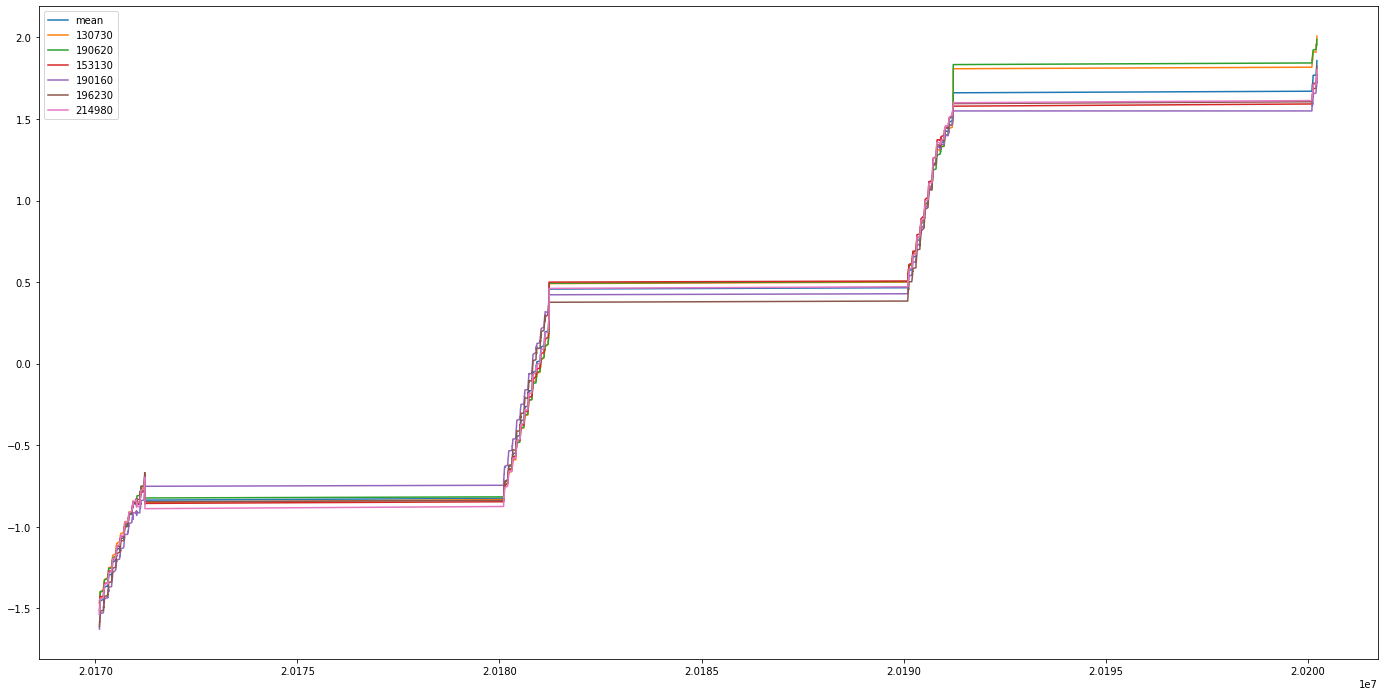

In [17]:
plt.figure(figsize=(24, 12))
plt.plot(set01_mean['close'],label='mean')
plt.plot(a130730['close'],label='130730')
plt.plot(a190620['close'],label='190620')
plt.plot(a153130['close'],label='153130')
plt.plot(a190160['close'],label='190160')
plt.plot(a196230['close'],label='196230')
plt.plot(a214980['close'],label='214980')

plt.legend()
plt.show()

#### 예제 set02

In [18]:
a166400 = data[data['code']==166400].reset_index().sort_values(by=['date'])
a166400=a166400[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a166400=a166400.set_index('date').loc['20170101':]
mean21 = a166400.mean(axis=0)
std21 = a166400.std(axis=0)
a166400 -= mean21
a166400 /= std21


a152500 = data[data['code']==152500].reset_index().sort_values(by=['date'])
a152500 = a152500[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152500 = a152500.set_index('date').loc['20170101':]
mean22 = a152500.mean(axis=0)
std22 = a152500.std(axis=0)
a152500 -= mean22
a152500 /= std22


a122630 = data[data['code']==122630].reset_index().sort_values(by=['date'])
a122630 = a122630[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a122630 = a122630.set_index('date').loc['20170101':]
mean23 = a122630.mean(axis=0)
std23 = a122630.std(axis=0)
a122630 -= mean23
a122630 /= std23


a226490 = data[data['code']==226490].reset_index().sort_values(by=['date'])
a226490 = a226490[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a226490 = a226490.set_index('date').loc['20170101':]
mean24 = a226490.mean(axis=0)
std24 = a226490.std(axis=0)
a226490 -= mean24
a226490 /= std24


a137930 = data[data['code']==137930].reset_index().sort_values(by=['date'])
a137930 = a137930[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a137930 = a137930.set_index('date').loc['20170101':]
mean25 = a137930.mean(axis=0)
std25 = a137930.std(axis=0)
a137930 -= mean25
a137930 /= std25

a123320 = data[data['code']==123320].reset_index().sort_values(by=['date'])
a123320=a123320[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a123320=a123320.set_index('date').loc['20170101':]
mean26 = a123320.mean(axis=0)
std26 = a123320.std(axis=0)
a123320 -= mean26
a123320 /= std26


a102110 = data[data['code']==102110].reset_index().sort_values(by=['date'])
a102110 = a102110[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a102110 = a102110.set_index('date').loc['20170101':]
mean27 = a102110.mean(axis=0)
std27 = a102110.std(axis=0)
a102110 -= mean27
a102110 /= std27


a152100 = data[data['code']==152100].reset_index().sort_values(by=['date'])
a152100 = a152100[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152100 = a152100.set_index('date').loc['20170101':]
mean28 = a152100.mean(axis=0)
std28 = a152100.std(axis=0)
a152100 -= mean28
a152100 /= std28


a105190 = data[data['code']==105190].reset_index().sort_values(by=['date'])
a105190 = a105190[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a105190 = a105190.set_index('date').loc['20170101':]
mean29 = a105190.mean(axis=0)
std29 = a105190.std(axis=0)
a105190 -= mean29
a105190 /= std29


a152280 = data[data['code']==152280].reset_index().sort_values(by=['date'])
a152280 = a152280[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152280 = a152280.set_index('date').loc['20170101':]
mean20 = a152280.mean(axis=0)
std20 = a152280.std(axis=0)
a152280 -= mean20
a152280 /= std20

In [19]:
set02_mean = (a166400+a152500+a122630+a226490+a137930+a123320+a102110+a152100+a105190+a152280 ) / 10

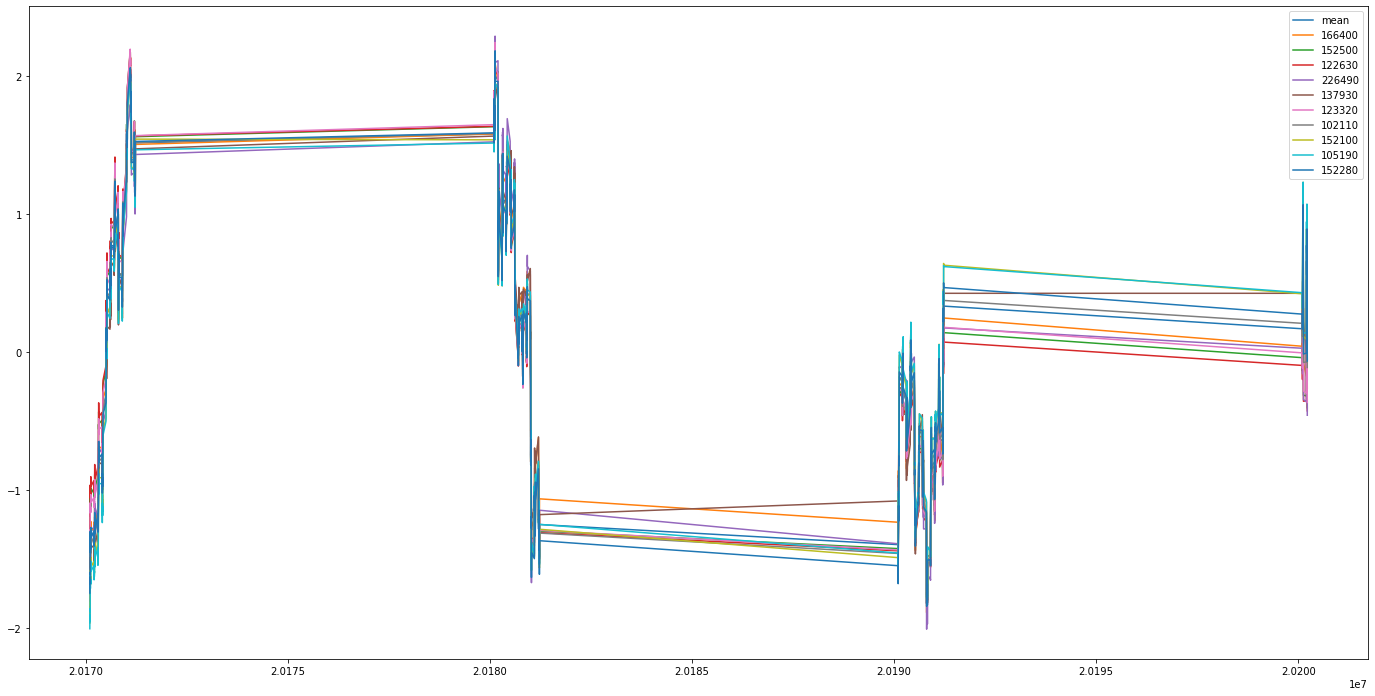

In [20]:
plt.figure(figsize=(24, 12))
plt.plot(set02_mean['close'],label='mean')
plt.plot(a166400['close'],label='166400')
plt.plot(a152500['close'],label='152500')
plt.plot(a122630['close'],label='122630')
plt.plot(a226490['close'],label='226490')
plt.plot(a137930['close'],label='137930')
plt.plot(a123320['close'],label='123320')
plt.plot(a102110['close'],label='102110')
plt.plot(a152100['close'],label='152100')
plt.plot(a105190['close'],label='105190')
plt.plot(a152280['close'],label='152280')
plt.legend()
plt.show()

#### 예제 set03

In [21]:
a152280 = data[data['code']==152280].reset_index().sort_values(by=['date'])
a152280=a152280[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152280=a152280.set_index('date').loc['20170101':]
mean31 = a152280.mean(axis=0)
std31 = a152280.std(axis=0)
a152280 -= mean31
a152280 /= std31



a170350 = data[data['code']==170350].reset_index().sort_values(by=['date'])
a170350 = a170350[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a170350 = a170350.set_index('date').loc['20170101':]
mean32 = a170350.mean(axis=0)
std32 = a170350.std(axis=0)
a170350 -= mean32
a170350 /= std32


a152500 = data[data['code']==152500].reset_index().sort_values(by=['date'])
a152500 = a152500[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152500 = a152500.set_index('date').loc['20170101':]
mean33 = a152500.mean(axis=0)
std33 = a152500.std(axis=0)
a152500 -= mean33
a152500 /= std33



a123320 = data[data['code']==123320].reset_index().sort_values(by=['date'])
a123320 = a123320[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a123320 = a123320.set_index('date').loc['20170101':]
mean34 = a123320.mean(axis=0)
std34 = a123320.std(axis=0)
a123320 -= mean34
a123320 /= std34


a122630 = data[data['code']==122630].reset_index().sort_values(by=['date'])
a122630 = a122630[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a122630 = a122630.set_index('date').loc['20170101':]
mean35 = a122630.mean(axis=0)
std35 = a122630.std(axis=0)
a122630 -= mean35
a122630 /= std35

In [22]:
set03_mean = (a152280 + a170350 + a152500 + a123320 + a122630 ) / 5

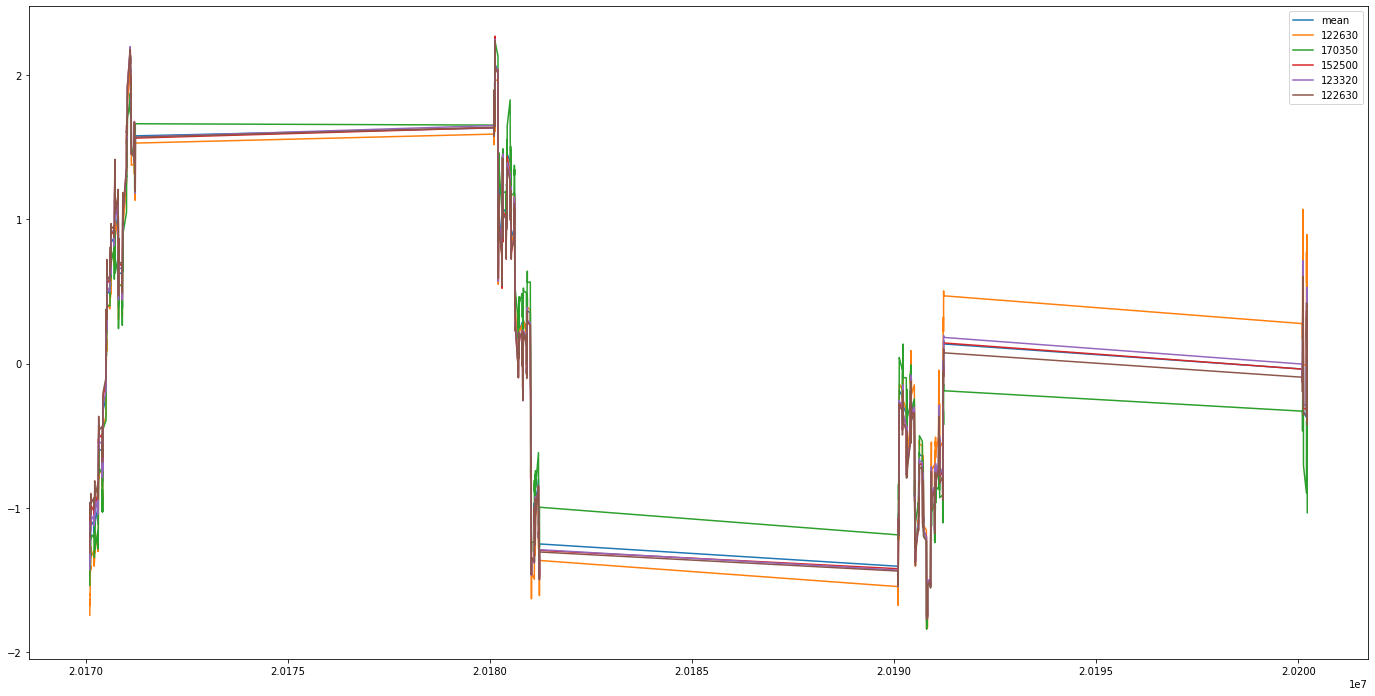

In [23]:
plt.figure(figsize=(24, 12))
plt.plot(set03_mean['close'],label='mean')
plt.plot(a152280['close'],label='122630')
plt.plot(a170350['close'],label='170350')
plt.plot(a152500['close'],label='152500')
plt.plot(a123320['close'],label='123320')
plt.plot(a122630['close'],label='122630')
plt.legend()
plt.show()

#### 예제 set04

In [24]:
set04 # 너무많음

['a152500',
 'a122630',
 'a102110',
 'a123320',
 'a152870',
 'a69500',
 'a152280',
 'a100910',
 'a152100',
 'a159800',
 'a183710',
 'a140950',
 'a148020',
 'a153270',
 'a226490',
 'a105190',
 'a108590',
 'a69660',
 'a156080',
 'a122090',
 'a168300']

#### 예제 set05

In [25]:
a152870 = data[data['code']==152870].reset_index().sort_values(by=['date'])
a152870=a152870[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152870=a152870.set_index('date').loc['20170101':]
mean51 = a152870.mean(axis=0)
std51 = a152870.std(axis=0)
a152870 -= mean51
a152870 /= std51



a227830 = data[data['code']==227830].reset_index().sort_values(by=['date'])
a227830 = a227830[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a227830 = a227830.set_index('date').loc['20170101':]
mean52 = a227830.mean(axis=0)
std52 = a227830.std(axis=0)
a227830 -= mean52
a227830 /= std52



a223190 = data[data['code']==223190].reset_index().sort_values(by=['date'])
a223190 = a223190[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a223190 = a223190.set_index('date').loc['20170101':]
mean53 = a223190.mean(axis=0)
std53 = a223190.std(axis=0)
a223190 -= mean53
a223190 /= std53


a105190 = data[data['code']==105190].reset_index().sort_values(by=['date'])
a105190 = a105190[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a105190 = a105190.set_index('date').loc['20170101':]
mean54 = a105190.mean(axis=0)
std54 = a105190.std(axis=0)
a105190 -= mean54
a105190 /= std54


a226490 = data[data['code']==226490].reset_index().sort_values(by=['date'])
a226490 = a226490[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a226490 = a226490.set_index('date').loc['20170101':]
mean55 = a226490.mean(axis=0)
std55 = a226490.std(axis=0)
a226490 -= mean55
a226490 /= std55



a69660 = data[data['code']==69660].reset_index().sort_values(by=['date'])
a69660 = a69660[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a69660 = a69660.set_index('date').loc['20170101':]
mean56 = a69660.mean(axis=0)
std56 = a69660.std(axis=0)
a69660 -= mean56
a69660 /= std56

In [26]:
set05_mean = (a152870 + a227830 + a223190 + a105190 + a226490 + a69660) / 6

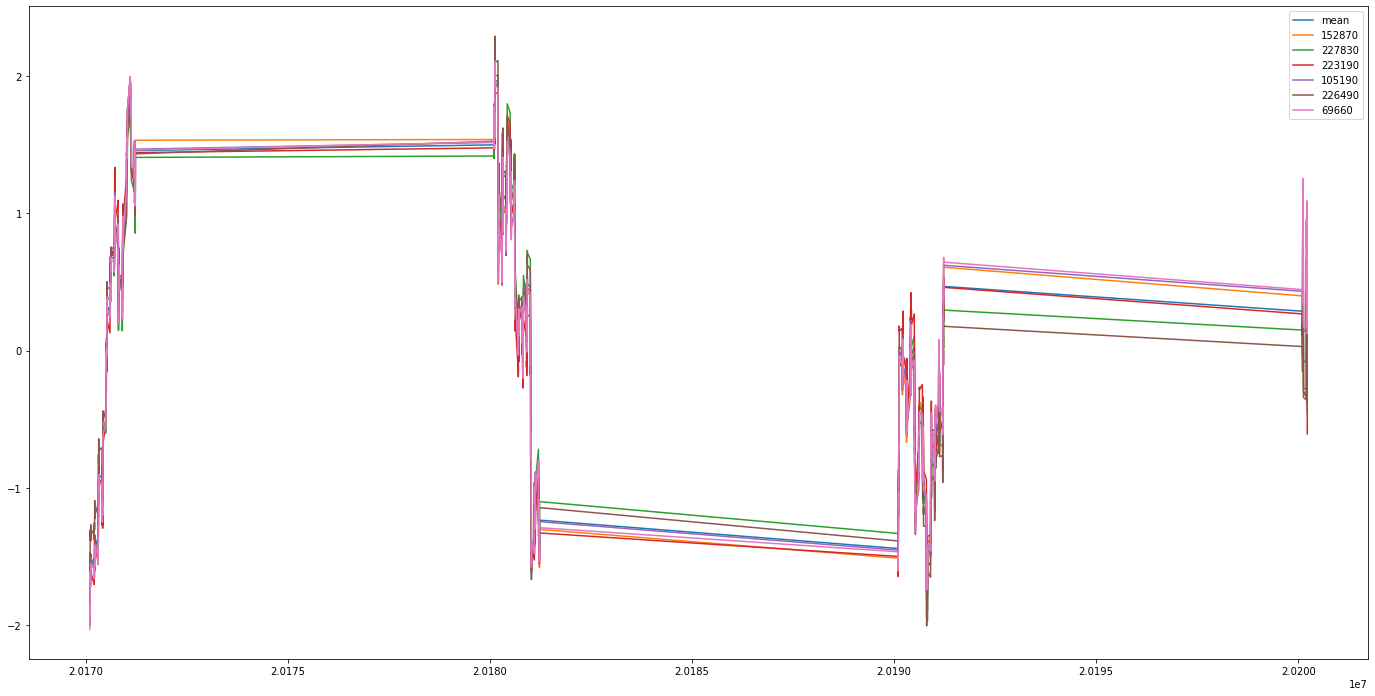

In [27]:
plt.figure(figsize=(24, 12))
plt.plot(set05_mean['close'],label='mean')
plt.plot(a152870['close'],label='152870')
plt.plot(a227830['close'],label='227830')
plt.plot(a223190['close'],label='223190')
plt.plot(a105190['close'],label='105190')
plt.plot(a226490['close'],label='226490')
plt.plot(a69660['close'],label='69660')

plt.legend()
plt.show()

#### 예제 set06

In [28]:
a143460 = data[data['code']==143460].reset_index().sort_values(by=['date'])
a143460=a143460[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a143460=a143460.set_index('date').loc['20170101':]
mean61 = a143460.mean(axis=0)
std61 = a143460.std(axis=0)
a143460 -= mean61
a143460 /= std61


a69500 = data[data['code']==69500].reset_index().sort_values(by=['date'])
a69500 = a69500[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a69500 = a69500.set_index('date').loc['20170101':]
mean62 = a69500.mean(axis=0)
std62 = a69500.std(axis=0)
a69500 -= mean62
a69500 /= std62


a105190 = data[data['code']==105190].reset_index().sort_values(by=['date'])
a105190 = a105190[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a105190 = a105190.set_index('date').loc['20170101':]
mean63 = a105190.mean(axis=0)
std63 = a105190.std(axis=0)
a105190 -= mean63
a105190 /= std63


a152100 = data[data['code']==152100].reset_index().sort_values(by=['date'])
a152100 = a152100[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152100 = a152100.set_index('date').loc['20170101':]
mean64 = a152100.mean(axis=0)
std64 = a152100.std(axis=0)
a152100 -= mean64
a152100 /= std64


a152280 = data[data['code']==152280].reset_index().sort_values(by=['date'])
a152280 = a152280[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a152280 = a152280.set_index('date').loc['20170101':]
mean65 = a152280.mean(axis=0)
std65 = a152280.std(axis=0)
a152280 -= mean65
a152280 /= std65

a102110 = data[data['code']==102110].reset_index().sort_values(by=['date'])
a102110=a102110[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a102110=a102110.set_index('date').loc['20170101':]
mean66 = a102110.mean(axis=0)
std66 = a102110.std(axis=0)
a102110 -= mean66
a102110 /= std66


a108590 = data[data['code']==108590].reset_index().sort_values(by=['date'])
a108590 = a108590[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a108590 = a108590.set_index('date').loc['20170101':]
mean67 = a108590.mean(axis=0)
std67 = a108590.std(axis=0)
a108590 -= mean67
a108590 /= std67


a226490 = data[data['code']==226490].reset_index().sort_values(by=['date'])
a226490 = a226490[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a226490 = a226490.set_index('date').loc['20170101':]
mean68 = a226490.mean(axis=0)
std68 = a226490.std(axis=0)
a226490 -= mean68
a226490 /= std68


a183710 = data[data['code']==183710].reset_index().sort_values(by=['date'])
a183710 = a183710[['date', 'open', 'high', 'low', 'close','trading_volume', 'score', 'index', 'probability','lgap', 
                 'lrate', 'code', 'l1_n', 'l2_n', 'l3_n', 'l4_n']]
a183710 = a183710.set_index('date').loc['20170101':]
mean69 = a183710.mean(axis=0)
std69 = a183710.std(axis=0)
a183710 -= mean69
a183710 /= std69

In [29]:
set06_mean = (a143460 + a69500 + a105190 + a152100 + a152280+a102110+a108590+a226490+a183710 ) / 5

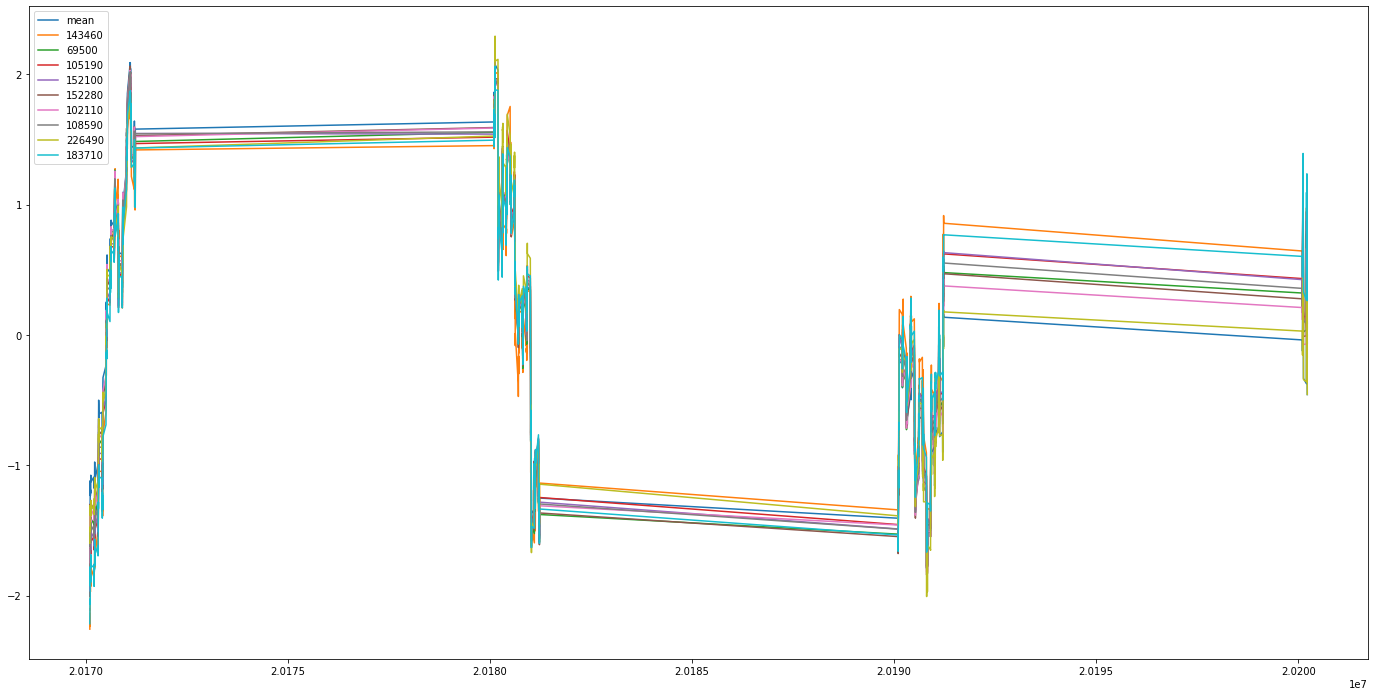

In [30]:
plt.figure(figsize=(24, 12))
plt.plot(set03_mean['close'],label='mean')
plt.plot(a143460['close'],label='143460')
plt.plot(a69500['close'],label='69500')
plt.plot(a105190['close'],label='105190')
plt.plot(a152100['close'],label='152100')
plt.plot(a152280['close'],label='152280')
plt.plot(a102110['close'],label='102110')
plt.plot(a108590['close'],label='108590')
plt.plot(a226490['close'],label='226490')
plt.plot(a183710['close'],label='183710')
plt.legend()
plt.show()